<a href="https://colab.research.google.com/github/nunocesarsa/Examples/blob/main/SimpleOperations/Finding_Possible_submatrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Issue:

When preparing data for a computer vision task we often have to reduce the size of the data into a smaller subset of the data that can be feed on the neural network. 

For example, if we are given an image of 1200 x 1200 size, then we might want to subsets for 24x24 of the image to train our model. This selection is either arbitary or dependant on the model we will use. 

Sometimes the size of the subset that we choose will "overshoot" the size of the original and therefore, we will have to add x amount of zeros to the matrice in order to not break the model. 

- Let's that we want to avoid padding the data and we want to create a function that efficiently finds which possible subset sizes i can create given some original matrix with size N x M. 

Formally, we given a subset of N x M we want to find all the possibilities of K x K such that:
- K <= N & K <= M 
- K % N = 0 & K % M = 0


In [91]:
import numpy as np
import math

import pandas as pd
import time

# Naive approach

- A for loop in each direction of the matrix which appends the ith value to an output array when the conditions are met. 
- When its a prime number, it return only 1 or itself. 
- Optionally, finds the common numbers between both directions to return the possible square matrices




In [99]:
test_mat = np.zeros((20,25))
test_mat2 = np.zeros((20,13))
test_mat3 = np.zeros((20,10))
test_mat4 = np.zeros((100,100))

def naive_method(in_matrix,returnSquare=False):

  #takes the shape parameters
  in_r, in_c = in_matrix.shape

  #empty to be filled
  r_arr = []
  c_arr = []

  for i in range(1,in_r+1): # so it includes all possibilities
    if in_r % i == 0:
      r_arr.append(i)
  
  for i in range(1,in_c+1):
    if in_c % i == 0:
      c_arr.append(i)

  if returnSquare == True:
    out_set = list(frozenset(r_arr).intersection(c_arr))
    return(sorted(out_set))

  else:
    out_set = [r_arr, c_arr]
    return(out_set)

#Function tested
print(naive_method(test_mat3,returnSquare=False))
print(naive_method(test_mat3,returnSquare=True))

[[1, 2, 4, 5, 10, 20], [1, 2, 5, 10]]
[1, 2, 5, 10]


#Less naive



In [103]:
def less_naive_method(in_matrix,returnSquare=False):

  #takes the shape parameters
  in_r, in_c = in_matrix.shape

  #empty to be filled
  r_arr = []
  c_arr = []

  i=1
  while i <= math.sqrt(in_r):
    if in_r % i == 0:
      
      r_arr.append(i)
      #check for repetition
      if (i != in_r/i):
        r_arr.append(int(in_r/i))
    i=i+1
  r_arr = sorted(r_arr)

  i=1
  while i <= math.sqrt(in_c):
    if in_c % i == 0:
      c_arr.append(i)
      #check for repetition
      if (i != in_c/i):
        c_arr.append(int(in_c/i))      
    i=i+1
  c_arr = sorted(c_arr)

  #in case we only want squared matrices
  if returnSquare == True:
    out_set = list(frozenset(r_arr).intersection(c_arr))
    return(sorted(out_set))

  else:
    out_set = [r_arr, c_arr]
    return(out_set)


print(less_naive_method(test_mat4,returnSquare=False))
print(less_naive_method(test_mat4,returnSquare=True))

[[1, 2, 4, 5, 10, 20, 25, 50, 100], [1, 2, 4, 5, 10, 20, 25, 50, 100]]
[1, 2, 4, 5, 10, 20, 25, 50, 100]


#Testing

In [107]:
test_mat = np.zeros((20,25))
test_mat2 = np.zeros((20,13))
test_mat3 = np.zeros((20,10))
test_mat4 = np.zeros((100,100))

print("Naive:" , naive_method(test_mat3))
print("Less naive:" ,less_naive_method(test_mat3))


Naive: [[1, 2, 4, 5, 10, 20], [1, 2, 5, 10]]
Less naive: [[1, 2, 4, 5, 10, 20], [1, 2, 5, 10]]


#Comparing computation time

In [139]:
iterator = []
time_naive = []
time_less_naive =[]

for i in range (10,10000+11,100):
  #print(i)

  #test matrix
  test_mat = np.zeros((i,i))

  iterator.append(i)

  init_time = time.time()
  bb=naive_method(test_mat,returnSquare=True)
  time_naive.append(time.time()-init_time)

  init_time = time.time()
  bb=less_naive_method(test_mat,returnSquare=True)
  time_less_naive.append(time.time()-init_time)

  d = {'Matrix': iterator, 'Time_naive': time_naive, 'Time_less_naive': time_less_naive}
  df = pd.DataFrame(data=d)


df



,Matrix,Time_naive,Time_less_naive
0,10,0.000037,0.000022
1,110,0.000059,0.000031
2,210,0.000072,0.000041
3,310,0.000052,0.000021
4,410,0.000090,0.000022
...,...,...,...
96,9610,0.001470,0.000070
97,9710,0.001513,0.000071
98,9810,0.001476,0.000080
99,9910,0.001492,0.000067


## Plotting

True


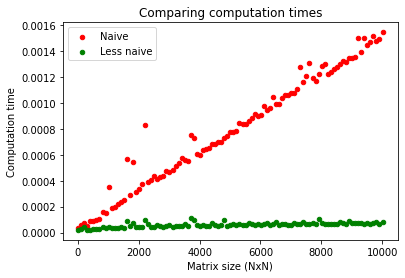

In [140]:

ax1 = df.plot(kind='scatter',x="Matrix",y="Time_naive",color="r",label="Naive",title="Comparing computation times")
ax2 = df.plot(kind='scatter',x="Matrix",y="Time_less_naive",color="g",ax=ax1,label="Less naive")
ax1.set_xlabel("Matrix size (NxN)")
ax2.set_ylabel("Computation time")

print(ax1 == ax2)

#In summary

- Naive approach increases linearly with the size of the matrix (O(n))
- The less naive increases a lot less! (O(sqrt(n))
  - For small images, its not a big deal but can easily become problematic (especially if we run N times on different images with large sizes)

This function is useful** to find a set of values that can be used for cropping a larger image into smaller segments without having to pad the smaller segments**. 